# Is there a relationship between GDP per capita and PISA scores?

July 2015 

Written by Susan Chen at NYU Stern with help from Professor David Backus

Contact: <jiachen2017@u.northwestern.edu>

##About PISA

Since 2000, the Programme for International Student Assessment (PISA) has been administered every three years to evaluate education systems around the world. It also gathers family and education background information through surveys. The test, which assesses 15-year-old students in reading, math, and science, is administered to a total of around 510,000 students in 65 countries. The duration of the test is two hours, and it contains a mix of open-ended and multiple-choice questions. Learn more about the test [here](http://www.oecd.org/pisa/test/).  

I am interested in seeing if there is a correlation between a nation's wealth and their PISA scores. Do wealthier countries generally attain higher scores, and if so, to what extent? I am using GDP per capita as the economic measure of wealth because this is information that could be sensitive to population numbers so GDP per capita in theory should allow us to compare larger countries (in terms of geography or population) with small countries. 

 
##Abstract 

In terms of the correlation between GDP per capita and each component of the PISA, the r-squared values for an OLS regression model, which usually reflect how well the model fits the data, are 0.57, 0.63, and 0.57 for reading, math, and science, respectively. Qatar and Vietnam, outliers, are excluded from the model.

####Packages Imported
I use **matplotlib.pyplot** to plot scatter plots. I use **pandas**, a Python package that allows for fast data manipulation and analysis, to organize my dataset. I access World Bank data through the remote data access API for pandas, **pandas.io**.  I also use **numpy**, a Python package for scientific computing, for the mathematical calculations that were needed to fit the data more appropriately. Lastly, I use **statmodels.formula.api**, a Python module used for a variety of statistical computations, for running an OLS linear regression. 

In [464]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from pandas.io import wb

##Creating the Dataset

In [465]:
file1 = '/users/susan/desktop/PISA/PISA2012clean.csv' # file location
df1 = pd.read_csv(file1)

#pandas remote data access API for World Bank GDP per capita data
df2 = wb.download(indicator='NY.GDP.PCAP.PP.KD', country='all', start=2012, end=2012)

In [466]:
#drop multilevel index 
df2.index = df2.index.droplevel('year') 

In [467]:
df1.columns = ['Country','Math','Reading','Science']
df2.columns = ['GDPpc']

In [468]:
#combine PISA and GDP datasets based on country column  
df3 = pd.merge(df1, df2, how='left', left_on = 'Country', right_index = True) 

In [469]:
df3.columns = ['Country','Math','Reading','Science','GDPpc']

In [470]:
#drop rows with missing GDP per capita values
df3 = df3[pd.notnull(df3['GDPpc'])] 

In [471]:
print (df3)

                 Country  Math  Reading  Science          GDPpc
2              Singapore   573      542      551   75630.362887
3   Hong Kong SAR, China   561      545      555   50346.649117
5            Korea, Rep.   554      536      538   31901.072927
6       Macao SAR, China   538      509      521  125515.187908
7                  Japan   536      538      547   34987.608282
9            Switzerland   531      509      515   54573.197208
10           Netherlands   523      511      522   45484.082518
11               Estonia   521      516      541   24760.559867
12               Finland   519      524      545   39488.977536
13                Canada   518      523      525   41865.045517
14                Poland   518      518      526   22740.224933
15               Belgium   515      509      505   40687.440797
16               Germany   514      508      524   42958.772318
17               Vietnam   511      508      528    4912.322206
18               Austria   506      490 

##Excluding Outliers 

I initially plotted the data and ran the regression without excluding any outliers. The resulting r-squared values for reading, math, and science were 0.29, 0.32, and 0.27, respectively. Looking at the scatter plot, there seem to be two obvious outliers, Qatar and Vietnam. I decided to exclude the data for these two countries because the remaining countries do seem to form a trend. I found upon excluding them that the correlation between GDP per capita and scores was much higher. 

Qatar is an outlier as it placed relatively low, 63rd out of the 65 countries, with a relatively high GDP per capita at about $131000. Qatar has a high GDP per capita for a country with just 1.8 million people, and only 13% of which are Qatari nationals. Qatar is a high income economy as it contains one of the world's largest natural gas and oil reserves.

[Vietnam](http://www.economist.com/blogs/banyan/2013/12/education-vietnam) is an outlier because it placed relatively high, 17th out of the 65 countries, with a relatively low GDP per capita at about $4900. Reasons for Vietnam's high score may be due to the investment of the government in education and the uniformity of classroom professionalism and discipline found across countries. At the same time, rote learning is much more emphasized than creative thinking, and it is important to note that many disadvantaged students are forced to drop out, reasons which may account for the high score. 

In [472]:
df3.index = df3.Country #set country column as the index 
df3 = df3.drop(['Qatar', 'Vietnam']) # drop outlier

##Plotting the Data

I use the log of the GDP per capita to plot against each component of the PISA on a scatter plot. 

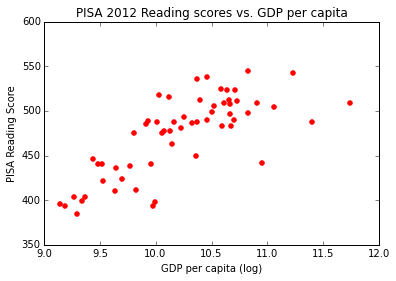

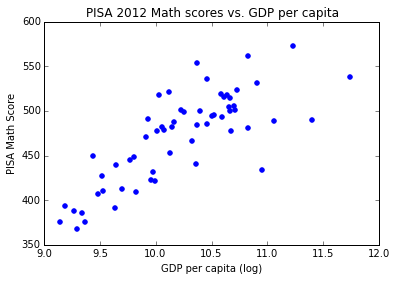

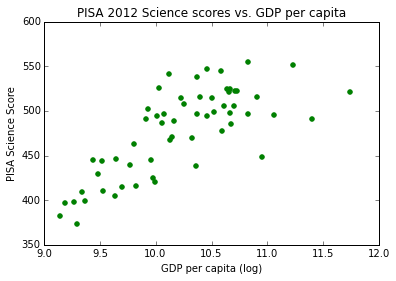

In [473]:
Reading = df3.Reading
Science = df3.Science
Math = df3.Math
GDP = np.log(df3.GDPpc)

#PISA reading vs GDP per capita
plt.scatter(x = GDP, y = Reading, color = 'r') 
plt.title('PISA 2012 Reading scores vs. GDP per capita')
plt.xlabel('GDP per capita (log)')
plt.ylabel('PISA Reading Score')
plt.show()

#PISA math vs GDP per capita
plt.scatter(x = GDP, y = Math, color = 'b')
plt.title('PISA 2012 Math scores vs. GDP per capita')
plt.xlabel('GDP per capita (log)')
plt.ylabel('PISA Math Score')
plt.show()

#PISA science vs GDP per capita
plt.scatter(x = GDP, y = Science, color = 'g')
plt.title('PISA 2012 Science scores vs. GDP per capita')
plt.xlabel('GDP per capita (log)')
plt.ylabel('PISA Science Score')
plt.show()


##Regression Analysis

The OLS regression results indicate that the there is a 0.57 correlation betweeen reading scores and GDP per capita, 0.63 between math scores and GDP per capita, and 0.57 between science scores and GDP per capita. 

In [474]:
lm = smf.ols(formula='Reading ~ GDP', data=df3).fit()
lm2.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Reading   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     76.56
Date:                Thu, 27 Aug 2015   Prob (F-statistic):           3.97e-12
Time:                        23:11:11   Log-Likelihood:                -281.78
No. Observations:                  59   AIC:                             567.6
Df Residuals:                      57   BIC:                             571.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -120.7619     67.968     -1.777      0.081      -256.866    15.342
GDP           58.1105      6.641      8.750      0.000        44.811    71.410
==============================================================================
Omnibus:                        2.433   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.893
Skew:                          -0.436   Prob(JB):                        0.388
Kurtosis:                       3.091   Cond. No.                         185.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [475]:
lm2 = smf.ols(formula='Math ~ GDP', data=df3).fit()
lm2.params
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Math   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     96.02
Date:                Thu, 27 Aug 2015   Prob (F-statistic):           7.87e-14
Time:                        23:11:11   Log-Likelihood:                -285.45
No. Observations:                  59   AIC:                             574.9
Df Residuals:                      57   BIC:                             579.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -236.7352     72.330     -3.273      0.002      -381.573   -91.898
GDP           69.2546      7.068      9.799      0.000        55.102    83.407
==============================================================================
Omnibus:                        0.740   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.281
Skew:                          -0.138   Prob(JB):                        0.869
Kurtosis:                       3.196   Cond. No.                         185.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [476]:
lm3 = smf.ols(formula='Science ~ GDP', data=df3).fit()
lm3.params
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Science   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     75.30
Date:                Thu, 27 Aug 2015   Prob (F-statistic):           5.22e-12
Time:                        23:11:11   Log-Likelihood:                -286.69
No. Observations:                  59   AIC:                             577.4
Df Residuals:                      57   BIC:                             581.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -162.6998     73.871     -2.202      0.032      -310.624   -14.776
GDP           62.6344      7.218      8.677      0.000        48.180    77.088
==============================================================================
Omnibus:                        0.232   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.426
Skew:                          -0.046   Prob(JB):                        0.808
Kurtosis:                       2.594   Cond. No.                         185.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Conclusion

The results show that countries with a higher GDP per capita seem to have a relatively higher advantage even though correlation does not imply causation. GDP per capita only reflects the potential of the country to divert financial resources towards education, and not how much is actually allocated to education. While the correlation is not weak, it is not strong enough to indicate the fact that a country's greater wealth will lead to a better education system. Deviations from the trend line would show that countries with similar performance on the PISA can vary greatly in terms of GDP per capita. The two outliers, Vietnam and Qatar, are two examples of that. At the same time, great scores are not necessarily indicative of a great educational system. There are many factors that need to be taken into consideration when evaluating a country's educational system, such as secondary school enrollment, and this provides a a great opportunity for further research. 

##Data Sources

PISA 2012 scores are downloaded from the [statlink](http://dx.doi.org/10.1787/888932937035) on page 21 of the published [PISA key findings](http://www.oecd.org/pisa/keyfindings/pisa-2012-results-volume-I.pdf).

GDP per capita data is accessed through the World Bank API for Pandas. Documentation is found [here](http://pandas.pydata.org/pandas-docs/stable/remote_data.html#remote-data-wb). GDP per capita is based on PPP and is in constant 2011 international dollars (indicator: NY.GDP.PCAP.PP.KD). 
